In [ ]:
# vamos a ver si las fiestas mejoran el modelo de predecir bicicletas

In [2]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from prophet import Prophet


In [3]:
df = pd.read_csv('../data/Bike_Sharing_Demand.csv',parse_dates = True)

df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    #print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')


In [6]:
df = df.rename(columns={'datetime': 'ds', 'count': 'y'})


In [7]:
validate = df[['ds','y']].tail(48)

df.drop(df[['ds','y']].tail(48).index,inplace=True)

train = df[['ds','y']]


In [8]:
m = Prophet(yearly_seasonality=True)
m.add_country_holidays(country_name='US')
m.fit(train)

Initial log joint probability = -328.075
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       18110.3   0.000861343       267.099      0.5405      0.5405      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       18110.5   8.62807e-05       74.6226           1           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       18111.1    0.00435336       84.6208      0.8639      0.8639      362   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     315       18111.1   8.92958e-05       98.3941   1.132e-06       0.001      420  LS failed, Hessian reset 
     397       18111.2   1.65121e-06        76.772      0.5005      0.5005      520   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [9]:
p = 48
future = m.make_future_dataframe(periods=p,freq='H',include_history=False)

In [10]:
forecast = m.predict(future)

timeseries_evaluation_metrics_func(validate.y,forecast.yhat)

MSE is : 10333.503603556235
MAE is : 61.641436870440295
RMSE is : 101.653842050147
MAPE is : 92.95519891803488
R2 is : 0.6880851934904583



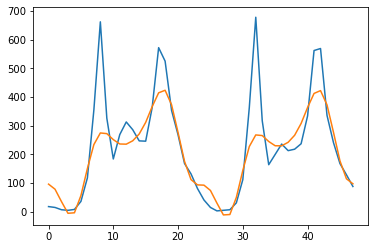

In [11]:
plt.plot(list(validate.y))
plt.plot(list(forecast.yhat))
# este nos da peor r^2 que el modelo inicial

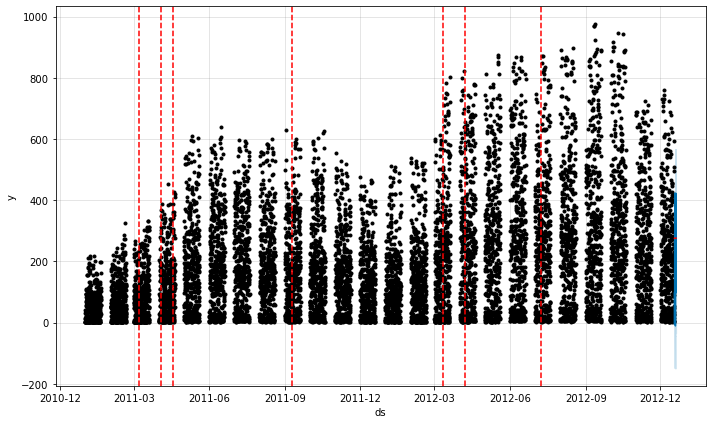

In [10]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)